**Hypothesis Tests for Two Population Means**

So far we focused on hypothesis tests for one population mean. However, in many application we want to compare the means of two or more populations. In the following sections we discuss inferential procedures for comparing the means of two populations. Therefore we first have to distinguish between samples from two populations that are **independent** and samples from populations that are not independent, which are called **paired samples**.

In the following sections we denote the parameters and the statistics of population $1$ and population $2$ with the subscript $1$ and $2$, respectively. Thus, $\mu_1$ and $\sigma_1$ are population parameters of population $1$ and $\mu_2$ and $\sigma_2$, those of population $2$. Similarly, $\bar{x_1},s_1,$ and $n_1$ are the sample mean, the sample standard deviation and the sample size of population $1$, whereas $\bar{x_2},s_2,$ and $n_2$ are the sample mean, the sample standard deviation and the sample size of population $2$, respectively.

For independent samples of sizes $n_1$ and $n_2$ of population $1$ and population $2$ the mean of all possible differences between the two sample means equals the difference between the two population means.

$$\mu_{\bar x_1 -\bar x_2} = \mu_1-\mu_2$$

Further, the standard deviation of all possible differences between the two sample means equals the square root of the sum of the population variances each divided by the corresponding sample size.

$$\sigma_{\bar x_1 -\bar x_2} = \sqrt{\frac{\sigma^2_1}{n_1} + \frac{\sigma^2_1}{n_2}}$$

A normally distributed variable or a large enough sample size (recall **the central limit theorem**) causes the difference of the sample means ($\bar{x_1} - \bar{x_2}$) to be normally distributed too. 

Hypothesis testing procedures for two population means are actually the same as for one population mean. Please note that in the following sections we focus on the $p$-value approach and do not discuss the critical value approach anymore. Therefore the hypothesis testing procedure is slightly revised. The step-wise procedure for hypothesis tests is summarized as follows

\begin{array}{l}
\hline
\ \text{Step 1}  & \text{State the null hypothesis } H_0 \text{ and alternative hypothesis } H_A \text{.}\\
\ \text{Step 2}  & \text{Decide on the significance level, } \alpha\text{.} \\
\ \text{Step 3}  & \text{Compute the value of the test statistic.} \\
\ \text{Step 4} &\text{Determine the p-value.} \\
\ \text{Step 5} & \text{If } p \le \alpha \text{, reject }H_0 \text{; otherwise, do not reject } H_0 \text{.} \\
\ \text{Step 6} &\text{Interpret the result of the hypothesis test.} \\
\hline 
\end{array}


**Inferences for Two Population Means, Using Independent Samples Standard Deviations Assumed Equal**

In this section we perform a hypothesis test for the means of two populations. We assume that the standard deviations of the two populations are equal but unknown. If, however, we knew $\sigma$, and the difference of sample means $(\bar{x}_1 - \bar{x}_2)$, the test statistic could be written as follows.

$$z = \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{\sigma \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

However, in almost all real life applications we do not $\sigma$. Thus, we estimate it beforehand. The best way to do that is to consider the sample variances, $s_1^2$ and $s_2^2$ as two estimates for $\sigma^2$. By pooling the two sample variances and weighting them according to the sample size, the estimate for $\sigma^2$ is given by

$$s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}$$

and by taking the square root we get


$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}}.$$

The quantity $s_p$ is called the **pooled sample standard deviation**. 

The replacement of $\sigma$ in the equation above with its estimate $s_p$, results in

$$t =  \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

The denominator $s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$ is the estimator of the standard deviation of $\bar{x}_1 - \bar{x}_2$, which can written as

$$ s_{\bar{x}_1 - \bar{x}_2} = s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$$

Please note that the equation for the test statistic $t$ has a $t$-distribution. The degrees of freedom $(df)$ are given by

$$df = n_1 + n_2 -2$$

**Interval Estimation of $\mu_1 - \mu_2$**

The $100(1-\alpha)$% confidence interval for $\mu_1 -\mu_2$ is given by 

$$  (\bar x_1 - \bar x_2) \pm t \times s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$$

where the value of $t$ is obtained from the $t$-distribution for the given confidence level and $n_1 +n_2 -2$ degrees of freedom.

**The pooled $t$-test: An example**

In [2]:
import pandas as pd

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

In order to showecase the pooled $t$-test we examine the mean annual salary (in Euro) of graduates. The first population consist of male students and the second population of female students. **The question is whether there is a difference in the mean annual salary of graduates realated to gender?**

**Data preparation**

We start with data prepartion.

- We subset the data set based on the binary <mark> graduated </mark> varibale, which indicates if the student has gradauted yet. The integer $1$ stands for graduated, $0$ indicates that the student did not graduate yet.

- Then we split the data set based on gender (male and female)

- Then we sample from each subset $50$ female and $50$ male students and extract the variable of interest, the mean annual salary (in Euro), which is stored in the column <mark> salary </mark>. We assign these two vectors to the varibles <mark> male_sample </mark> and <mark> female_sample </mark>

In [6]:
graduate_df = students_df[students_df['graduated']==1]

male = graduate_df[graduate_df['gender'] == 'Male']
female = graduate_df[graduate_df['gender'] == 'Female']

n = 50

import numpy as np

male_sample = np.random.choice(male['salary'], n)
female_sample = np.random.choice(female['salary'], n)

Further, we test the normality assumption by plotting a normal probability plot, often referred to as **Q-Q** plots. If the variable is normally distributed, the normal probability plot should be roughly linear.

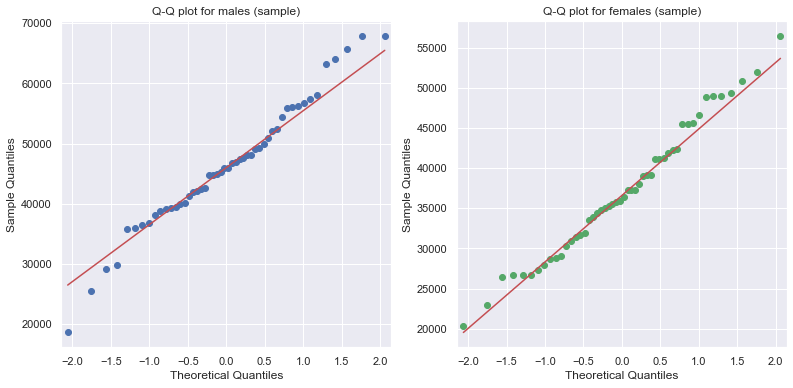

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(13,6)})

fig,axs = plt.subplots(ncols=2)

sm.qqplot(male_sample, ax = axs[0], line='q')
axs[0].set_title('Q-Q plot for males (sample)')

sm.qqplot(female_sample, ax = axs[1], line = 'q', color='g')
axs[1].set_title('Q-Q plot for females (sample)')

pass

We see that the sample data is somehow noisy, but it is still roughly normal distributed. The deviation from the straight line in the upper and lower part suggest, that the probability distribution is slightly skewed.

Further we check, if the standard deviation of the two populations are roughly equal. As a rule of thumb, the condition of equal population standard deviation is met, if the ratio of the larger to the smaller sample standard deviation is less than $2$. Let us assume that the data of the <mark> students </mark> data set is a good approximation for the population.

In [31]:
sd_m = male['salary'].std()
sd_f = female['salary'].std()

sd_m/sd_f

1.2494996783136274

The ratio is approximately $1.249$ and thus, we conclude that the equal population standard deviations criterion is fulfilled. A simple visualization technique for evaluating the spread of a variable is to plot a box plot.

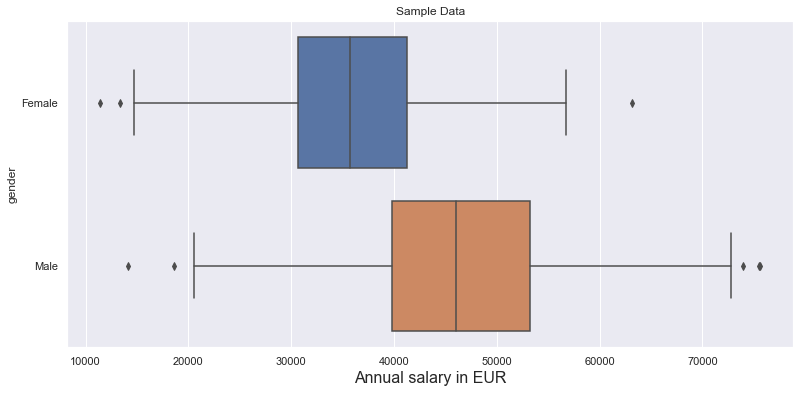

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x= 'salary', y = 'gender', data = students_df)
plt.title('Sample Data')
plt.xlabel('Annual salary in EUR', fontsize=16)

pass

**Hypothesis testing**

We conduct the **pooled $t$-test** by following the step-wise implementation procedure for hypothesis testing.

**Step 1: State the null hypothesis $H_0$ and alternative hypothesis $H_A$**

The nully hypothesis states that the average annual salary of male graduates $(\mu_1)$ is equal to the average annual salarly of female graduates $(\mu_2)$.

$$H_0 : \mu_1 = \mu_2$$

Recall, that the formulation of the alternative hypothesis dictates if we apply a two-sided, a left tailed or a right tailed hypothesis test. We want to test if the salary of male graduates $(\mu_1)$ is higher than the average annual salary of female graduates $(\mu_2)$, thus, the alternative hypothesis is formulated as follows

- **Alternative hypothesis**

$$H_A : \mu_1 > \mu_2$$

This formulation results in a right tailed hypothesis test.

**Step 2: Decide on the significance level, $\alpha$**

$$\alpha = 0.01$$

In [38]:
alpha = 0.01

**Step 3 and 4: Compute the value of the test statistic and the p-value.**

For illustration purposes we compute the test statistic manually in Python. Recall the equation for the test statistic from above.

$$t =  \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

If $H_0$ is true, then $\mu_1 - \mu_2 = 0$ and thus, the equation simplifies to

$$t =  \frac{(\bar x_1 - \bar x_2)}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}},$$

where $s_p$ is

$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}}$$

In [41]:
# compute the value of the test statistic

import numpy as np
import math

n1 = len(male_sample)
n2 = len(female_sample)
s1 = np.std(male_sample, ddof=1)
s2 = np.std(female_sample, ddof=1)
x1_bar = np.mean(male_sample)
x2_bar = np.mean(female_sample)

sp = math.sqrt(((n1-1)*(s1**2)+(n2-1)*(s2**2))/(n1+n2-2))

t_statistic = (x1_bar-x2_bar)/(sp * math.sqrt(1/n1+1/n2))

t_statistic

4.9010121770459305

The numerical value of the test statistic is $4.901012177$

In order to calculate the $p$-value we apply the <mark> cdf </mark> function. Recall how to calculate the degrees of freedom

$$df = n_1 + n_2 -2 = 50 +50 -2 = 98$$

In [42]:
from scipy.stats import t

df = n1 + n2 -2

p = 1-t.cdf(t_statistic,df)

p

1.887409337375523e-06

**Step 5: If $p\leq \alpha$, reject $H_0$; otherwise, do not reject H_0**.

The p-value is less than the specified significance level of $0.01$; we reject $H_0$. The test results are statistically significant at the $1$% level and provide very strong evidence against the null hypothesis.

**Step 6: Interpret the result of the hypothesis test**

$p=1.887409337375523 \times 10^{-6}$. At the $1$% significance level, the data provides very strong evidence to conclude that the average salary of male graduates is higher than the average salary of female graduates.

In [45]:
# This is a two-sided test for the null hypothesis 
#that 2 independent samples have identical average (expected)
#values. This test assumes that the populations have 
#identical variances by default.

from scipy.stats import ttest_ind

ttest_ind(male_sample, female_sample)

Ttest_indResult(statistic=4.9010121770459305, pvalue=3.7748186748043446e-06)